# Clustering Jerárquico en el Dataset Zoo
Este notebook es una base para la tarea de clustering jerárquico usando el dataset Zoo.

   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize  type  
0         1         0     0     4     0         0        1     1  
1         1         0     0     4     1         0        1     1  
2         0         0     1     0     1         0        0     4  
3         1         0     0     4     0         0        1     1  
4         1         0     0     4     1         0        1     1  


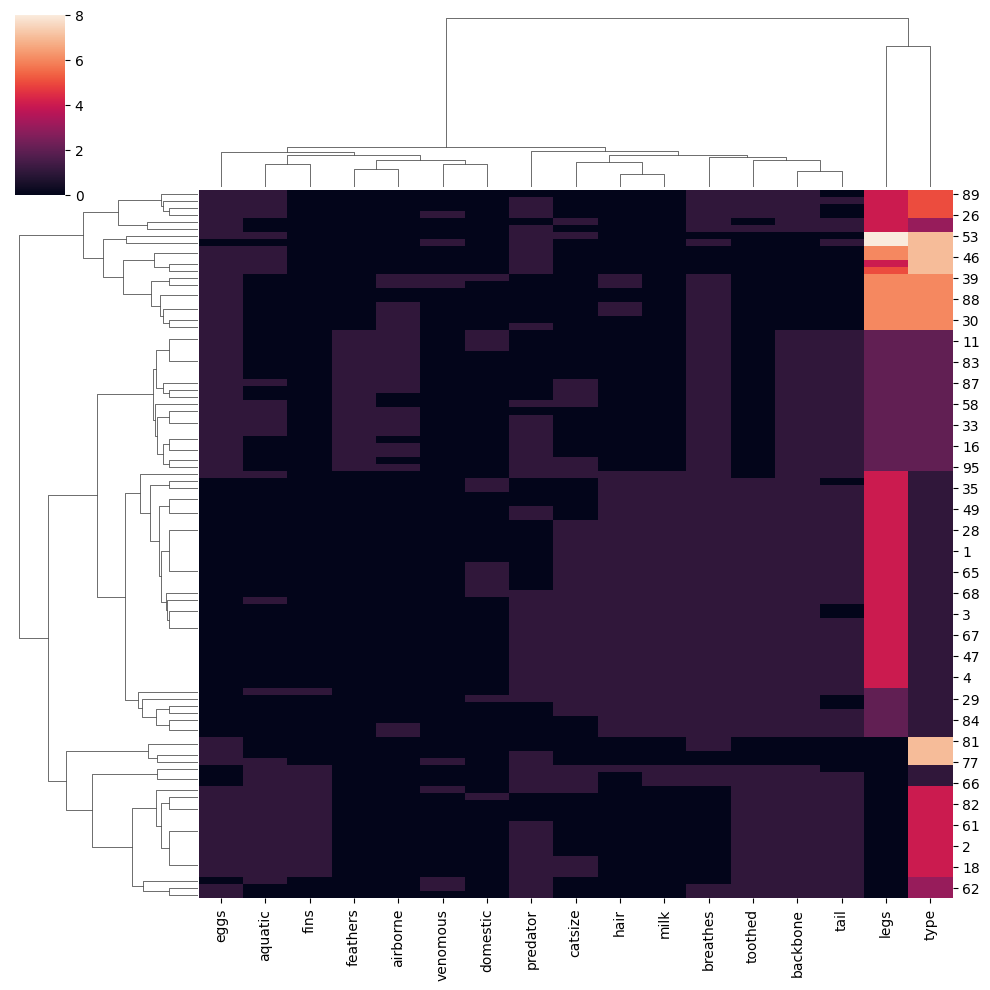

In [9]:
# Paso 1: Cargar el dataset
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from ucimlrepo import fetch_ucirepo

# Cargar dataset Zoo
zoo = fetch_ucirepo(id=111)

# Separar atributos y variable objetivo
X = zoo.data.features # df
y = zoo.data.targets # df

# Combinar en un solo df para mostrar ejemplos de datos
df = pd.concat([X, y], axis=1)
print(df.head())

# Gráfico: heatmap
sns.clustermap(df)
plt.show()

       hair  feathers      eggs      milk  airborne   aquatic  predator  \
0  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208  0.896421   
1  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208 -1.115547   
2 -0.861034 -0.496904  0.843721 -0.826640 -0.558291  1.343710  0.896421   
3  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208  0.896421   
4  1.161395 -0.496904 -1.185227  1.209717 -0.558291 -0.744208  0.896421   

    toothed  backbone  breathes  venomous      fins      legs      tail  \
0  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540 -1.698416   
1  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540  0.588784   
2  0.809776   0.46569 -1.951800 -0.293294  2.222876 -1.404435  0.588784   
3  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540 -1.698416   
4  0.809776   0.46569  0.512348 -0.293294 -0.449868  0.572540  0.588784   

   domestic   catsize  
0 -0.384353  1.138180  
1 -0.384353  1.138180  
2 -0.384353 -0.878595  
3 

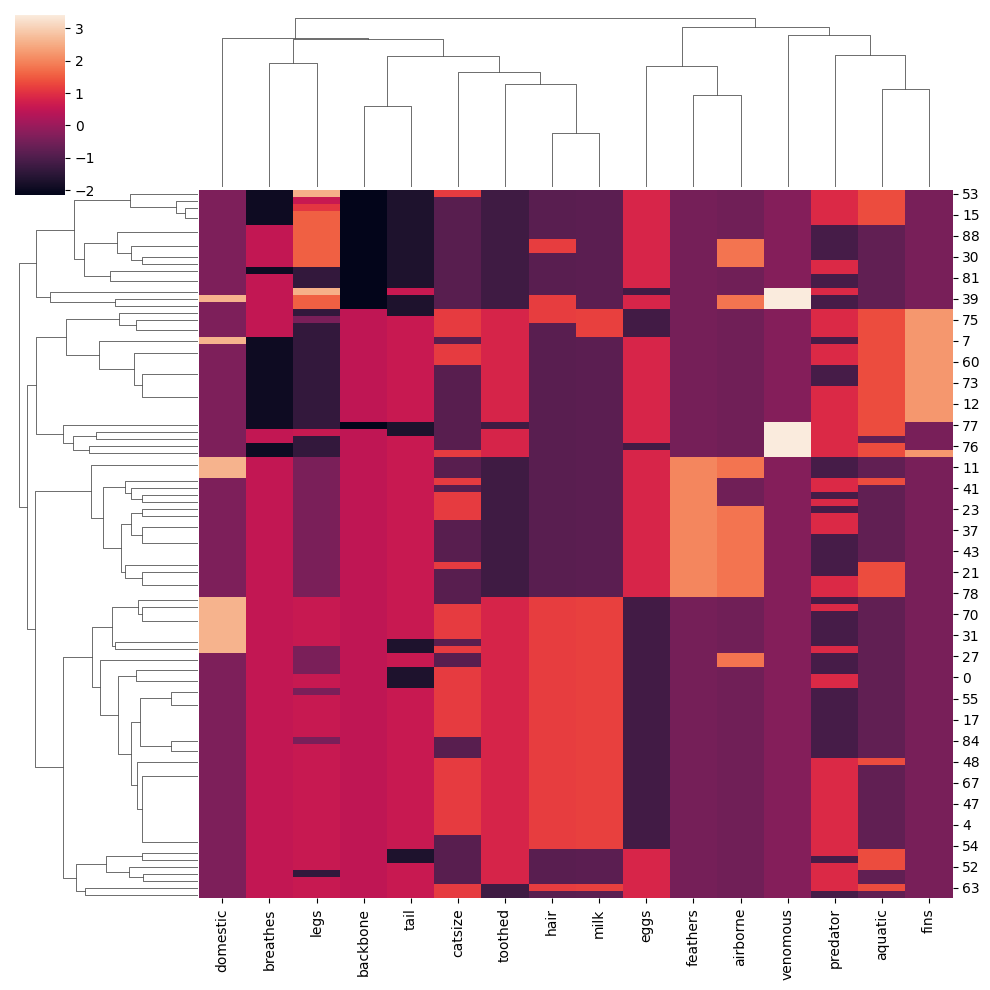

In [10]:
# Paso 2: Preprocesamiento (One Hot Encoding y Escalamiento)
from sklearn.preprocessing import StandardScaler

# Separar en atributos y variable objetivo nuevamente para preprocesar los atributos
X = df.drop(columns=['type'])  
y = df['type']

# One Hot Encoding solo en en el atributo 'legs'. No es necesario aplicar para las demás columnas porque ya son binarias
df = pd.get_dummies(df, columns=['legs'])

# Escalar los atributos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Mostrar el df escalado
print(X_scaled_df.head())

# Gráfico: heatmap del df escalado
sns.clustermap(X_scaled_df)
plt.show()

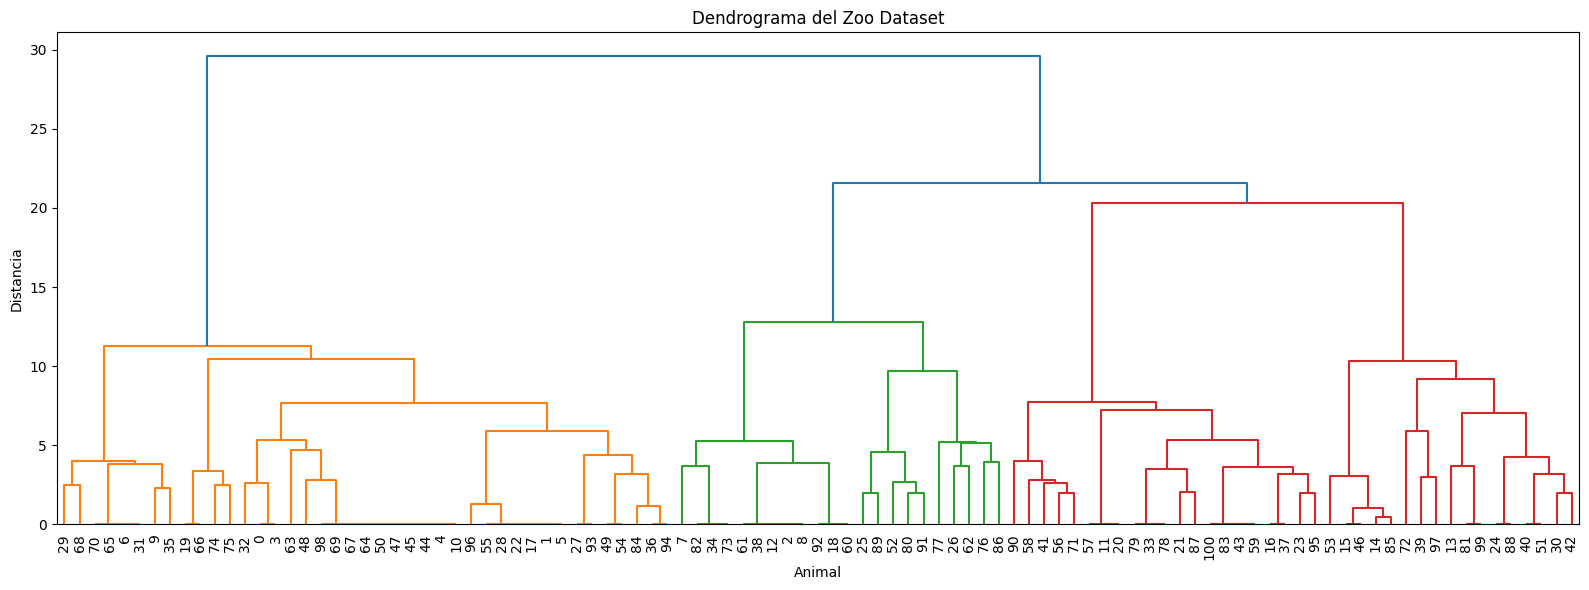

type      1   2  3   4  5  6  7
cluster                        
1         8   0  0   0  0  0  0
2         4   0  0   0  0  0  0
3        29   0  0   0  0  0  0
4         0   0  0  12  0  0  0
5         0   0  4   1  4  0  1
6         0  20  1   0  0  0  0
7         0   0  0   0  0  8  9


In [11]:
# Paso 3: Clustering Jerárquico
from scipy.cluster.hierarchy import linkage, dendrogram

# Linkage crea la estructura jerárquica, usando el método 'ward' para minimizar la varianza intracluster
Z = linkage(X_scaled_df, method='ward')

# Dendrograma para visualizar la jerarquía
plt.figure(figsize=(16, 6))
dendrogram(
    Z,
    labels=X_scaled_df.index.tolist(),  
    leaf_rotation=90,
    leaf_font_size=10
)
plt.title("Dendrograma del Zoo Dataset")
plt.xlabel("Animal")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()

# Asignar clusters a los datos, para poder visualizar grupos artificiales y compararlos con la variable objetivo (type: 7 tipos de animales)
from scipy.cluster.hierarchy import fcluster

# Cortar el dendrograma para obtener 7 clusters
clusters = fcluster(Z, t=7, criterion='maxclust')

# Agregar columna de clusters al df
X_scaled_df['cluster'] = clusters

# Comparar clusters con la clase real (type)
# Unir con y (type)
results = pd.concat([X_scaled_df['cluster'], y], axis=1)
# Ver distribución de tipos reales por cluster
comparision = pd.crosstab(results['cluster'], results['type'])
print(comparision)

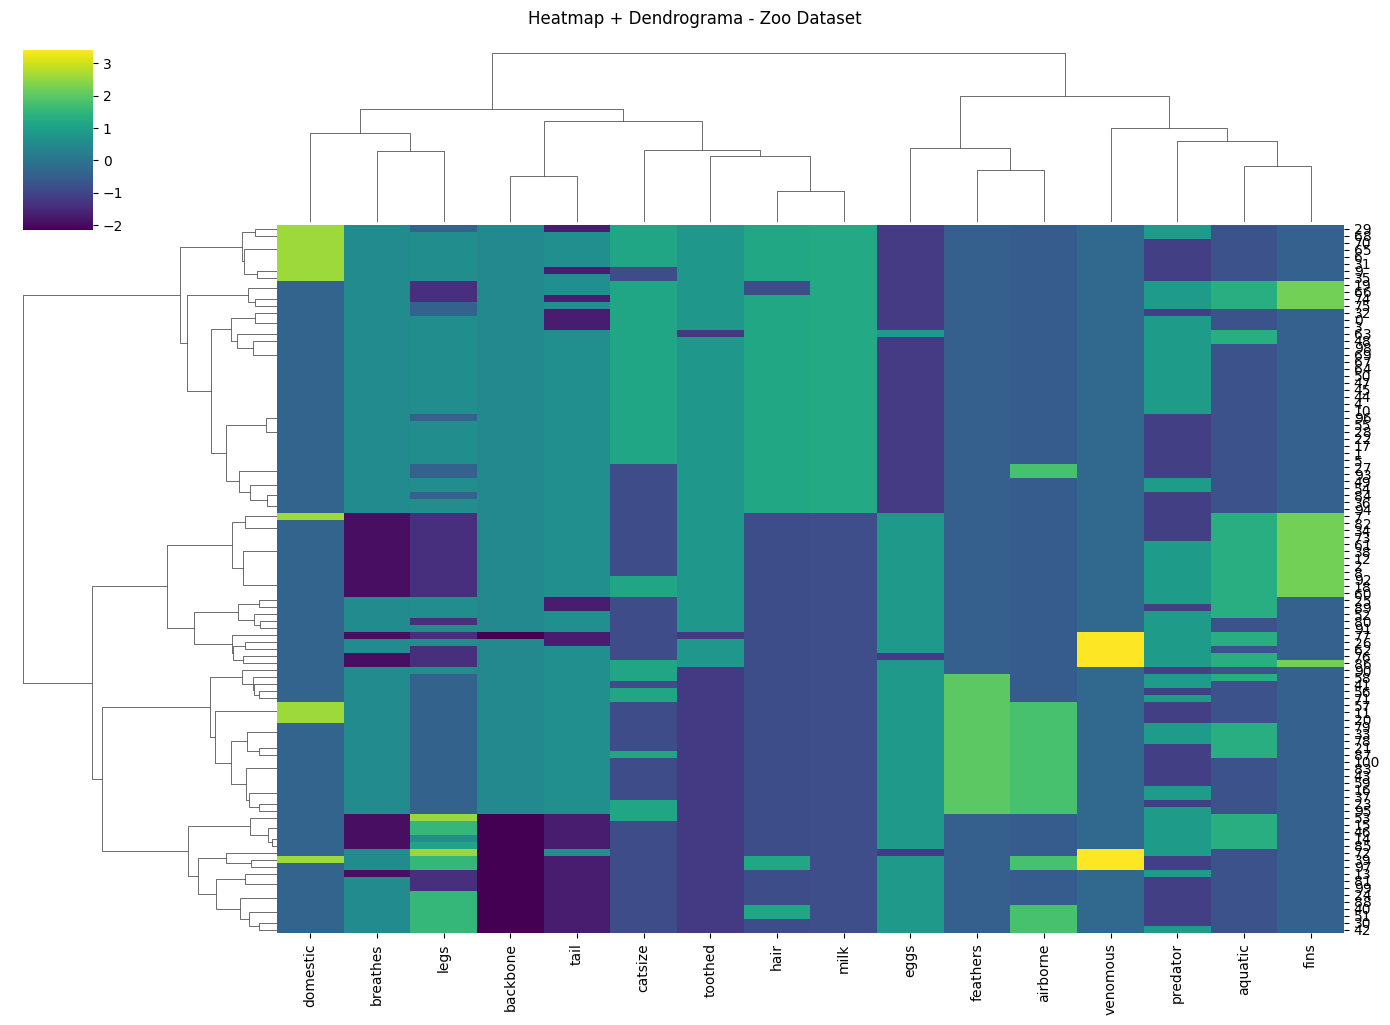

In [12]:
# Paso 4: Heatmap
sns.clustermap(
    X_scaled_df.drop(columns=['cluster']), 
    method='ward',          # método de linkage
    metric='euclidean',     # métrica de distancia
    cmap='viridis',        
    figsize=(14, 10),
    xticklabels=True,
    yticklabels=True
)

plt.suptitle("Heatmap + Dendrograma - Zoo Dataset", y=1.02)
plt.show()


# Conclusiones
El clustering jerárquico aplicado al dataset Zoo permitió agrupar animales según sus características biológicas. Si bien no todos los grupos coinciden exactamente con los tipos reales (type), se observaron patrones coherentes, como la agrupación de mamíferos o peces. El uso del método Ward y la estandarización previa ayudaron a obtener grupos más balanceados y consistentes.

## Pregunta 1
1. ¿Cuántos clusters se pueden identificar claramente en el dendrograma?

    Es difícil de ver o "subjetivo", pero podría considerarse que es posible ver entre 4 y 8 clusters dependiendo de en qué atributos se esté poniendo más atención.


## Pregunta 2
2. ¿Qué características parecen determinar la formación de los clusters?

    Es probable que Las características que más influencian la formación de los clusters incluyen:

* hair, milk → típicamente mamíferos
* feathers, airborne → aves
* aquatic, fins → peces
* eggs, venomous → reptiles o anfibios

    Además, la variable legs (con codificación one-hot) también ayuda a separar insectos e invertebrados.

## Pregunta 3
3. ¿Los resultados del clustering tienen sentido biológico o zoológico?

    En general, sí. Muchos animales quedan agrupados según su clase zoológica. Aunque hay excepciones, los resultados reflejan patrones biológicos reales, especialmente en características fisiológicas clave.

## Pregunta 4
4. ¿Cómo afecta la normalización de los datos al clustering?

    La normalización es fundamental. Sin ella, variables como legs (que puede tener valores de 0 a 8) dominarían sobre las binarias (0/1), distorsionando las distancias. Con StandardScaler, todas las variables contribuyen equitativamente a la formación de los clusters, lo que mejora la calidad del agrupamiento.

## Pregunta 5
5. ¿Qué método de linkage utilizaste y por qué?

    Se utilizó el método Ward, porque minimiza la varianza dentro de cada cluster al momento de fusionar grupos. Es ideal cuando se usan datos escalados y se busca crear clusters de tamaño similar y bien separados.

## Pregunta 6
6. ¿Qué otras técnicas de clustering podrías aplicar a este dataset y por qué?

* **K-Means:** permite agrupar animales rápidamente en un número fijo de clusters. Aunque necesita definir k previamente, puede servir como punto de comparación con clustering jerárquico, especialmente si se buscan agrupaciones esféricas y rápidas.

* **DBSCAN:** útil para detectar grupos densos y outliers sin necesidad de predefinir el número de clusters. Podría ayudar a encontrar animales únicos (como el ornitorrinco o el "girl") que no encajan bien en ningún grupo tradicional.

* **AgglomerativeClustering (de sklearn):** es una implementación eficiente del clustering jerárquico. Sirve si se quiere aplicar clustering jerárquico con mayor control y rendimiento en datasets más grandes.

* **t-SNE + clustering visual:** proyecta los datos en 2D respetando estructuras no lineales. Puede ser muy útil para visualizar cómo se distribuyen los animales en el espacio de características y aplicar clustering sobre esa visualización para interpretarlo mejor.